In [2]:
from pandas import read_csv
import datetime
import numpy as np

from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

series_new = read_csv('../data/clean_df.csv', header=0, parse_dates=[2], index_col=0, squeeze=True)

In [3]:
series_new['day'] = [datetime.datetime(row['localhour'].year,row['localhour'].month, row['localhour'].day) 
     for index, row in series_new.iterrows()]

In [4]:
errors = []
from datetime import timedelta

for dataid in series_new['dataid'].unique():
    
    predict_list = []
    actual_list = []
    
    for index, row in series_new[(series_new['localhour']>= '2015-04-01') & (series_new['dataid']==dataid) & 
                                 (series_new['localhour']< '2015-04-02')].sort_values('localhour').iterrows():
        day_start = (datetime.datetime(row['localhour'].year,row['localhour'].month, row['localhour'].day) 
            - timedelta(days=10))
        top_three_dates = list(series_new[(series_new['dataid']==row['dataid']) & (series_new['day']>=day_start) & 
               (series_new['day'] < day_start + timedelta(days=10))].groupby('day')['usage'].sum().sort_values(ascending=False)[:3].index) 
        avg_usage = 0
        for date in top_three_dates:
            avg_usage += (series_new[(series_new['dataid']==row['dataid']) & (series_new['day']==date) & 
                       (series_new['hour']==row['hour'])]['usage']).values[0]

        avg_usage = avg_usage/ 3.0
        predict_list.append(avg_usage)
        actual_list.append(row['usage'])
    error = mean_squared_error(actual_list, predict_list)
    errors.append(error)
    print('Ave error: ' + str(sum(errors)/len(errors)) + ", Dataid: " + str(dataid) + " , Error: " + str(error), end="\r")

    


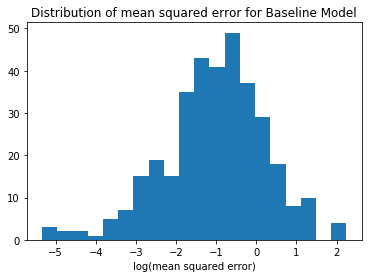

Ave mean squared error: 0.718466826596


In [32]:
pyplot.hist(np.log(errors), bins=20)
pyplot.xlabel("log(mean squared error)")
pyplot.title("Distribution of mean squared error for Baseline Model")
pyplot.show()

print('Ave mean squared error: ' + str(sum(errors)/len(errors)))

In [33]:
errors

[0.48655067861239737,
 0.66877673126286064,
 0.63155600375771714,
 0.20437238464120414,
 0.10462018824331283,
 1.1222890676890438,
 0.066295242586162526,
 0.0391354850681584,
 0.16421316428883745,
 0.08671974042566867,
 2.7752201663721698,
 0.15605017135802429,
 1.0799450377147637,
 1.6353189198919733,
 0.044666649400719981,
 0.97268252763503116,
 0.14875687263117279,
 0.3139431065393512,
 9.4544911249099837,
 1.057915174380142,
 0.20598151349279845,
 0.80590209621013342,
 0.63470002237525669,
 0.23224011778163542,
 0.093959228998199765,
 0.12004357912037006,
 0.41191324938143037,
 0.32003032813914589,
 1.1488730230851341,
 0.09813983354552476,
 0.09044312163323058,
 0.58078255724408467,
 0.19330546176697536,
 0.30376183018261332,
 0.76413406840020681,
 0.054753356019804689,
 0.7742443399447021,
 0.084343884884259437,
 0.46344151449202647,
 0.16915657823559624,
 0.43919428099794305,
 0.10293270436599787,
 0.72026334204346609,
 1.3770588388670266,
 0.39834557280221067,
 0.10261710589763

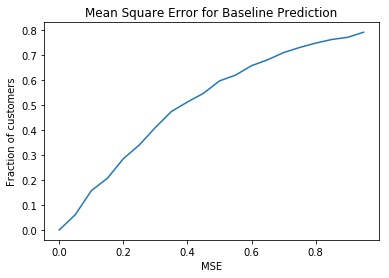

In [34]:
perc_errors = []
perc_list = []
for perc in np.arange(0,20,1):
    perc= perc/20.0
    num = sum([1 if row < perc else 0 for row in errors])
    perc_errors.append(num/len(errors))
    perc_list.append(perc)
pyplot.plot(perc_list, perc_errors)
pyplot.xlabel("MSE")
pyplot.ylabel("Fraction of customers")
pyplot.title("Mean Square Error for Baseline Prediction")
pyplot.show()


In [16]:
len(perc_errors)

20

In [28]:
perc_errors

[0.0,
 0.061224489795918366,
 0.15743440233236153,
 0.20699708454810495,
 0.2857142857142857,
 0.34110787172011664,
 0.4110787172011662,
 0.4752186588921283,
 0.5131195335276968,
 0.5481049562682215,
 0.597667638483965,
 0.6209912536443148,
 0.6588921282798834,
 0.6822157434402333,
 0.7113702623906706,
 0.7317784256559767,
 0.749271137026239,
 0.7638483965014577,
 0.7725947521865889,
 0.793002915451895]

In [ ]:
pyplot.figure(figsize=(15,8))
pyplot.plot(actual_list[:24], label="Actuals")
pyplot.plot(predict_list[:24], color='red', label="Predictions")
pyplot.xlabel("Hour of the Month")
pyplot.ylabel("Electricity Usage (kWh)")
pyplot.title("Baseline Usage Prediction - 4/1/2015")
pyplot.legend()
pyplot.show()